<a href="https://colab.research.google.com/github/dona-nice/Deep-Learning/blob/master/Deep_Learning_Using_FFDNN(ReducedFeatures_Latest4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FFDNN Keras implementation**

In [ ]:
# import relevant modules

import pandas as pd
import numpy as np
#import random as python_random
from tensorflow import random
np.random.seed(42)
random.set_seed(42)


from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



#**Load dataset**

In [ ]:
#Load NSL_KDD train dataset
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.csv to KDDTrain+.csv


In [ ]:
##Load NSL_KDD test dataset
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.csv to KDDTest+.csv


In [ ]:
# Import the loaded csv file into Pandas data frame


# Dataset field names

datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

#Read Train set into Dataframe
df_NLSKDDTrain = pd.read_csv('KDDTrain+.csv', names=datacols) 

df_NLSKDDTrain = df_NLSKDDTrain.iloc[:,:-1]

#Read Test set into Dataframe
df_NLSKDDTest = pd.read_csv('KDDTest+.csv', names=datacols) 

df_NLSKDDTest = df_NLSKDDTest.iloc[:,:-1]

#Show Train set Data types and shape
print(f"The Data type = \n\n{df_NLSKDDTrain.dtypes}\n\n")

print(f"Shape of Training Dataset: {df_NLSKDDTrain.shape}\n\n")


The Data type = 

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_ser

**Train Data**

In [ ]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(df_NLSKDDTrain.shape[0], df_NLSKDDTrain.shape[1]))

#View Train data

df_NLSKDDTrain.head(10)

Train set dimension: 125973 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


**Test Data**

In [ ]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(df_NLSKDDTest.shape[0], df_NLSKDDTest.shape[1]))

#View Test data

df_NLSKDDTest.head(10)

Test set dimension: 22544 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd


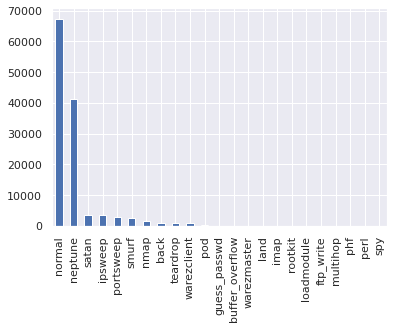

In [ ]:
#Understand the data 
#sns.countplot(x="attack", data=df_NLSKDDTrain) #N - Normal   A - Attack

df_NLSKDDTrain['attack'].value_counts().plot(kind='bar')

In [ ]:
# Group the various attacks and Non attack type
df_NLSKDDTrain.groupby(['attack']).count()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
attack,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956
buffer_overflow,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
ftp_write,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
guess_passwd,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
imap,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
ipsweep,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599
land,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
loadmodule,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
multihop,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
# Show all attacks and non attacks
df_NLSKDDTrain['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [ ]:
##Split data into train and test to verify accuracy after fitting the model. 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
#Convert all non-normal observations into a single class:
def attack_anomalous(text):
    #"""Binarize target labels into normal or anomalous."""
    if text == "normal":
         return 0
    else:
         return 1

df_NLSKDDTrain["attack"] = df_NLSKDDTrain["attack"].apply(attack_anomalous)
df_NLSKDDTest["attack"] = df_NLSKDDTest["attack"].apply(attack_anomalous)



#df_NLSKDD["attack"].head()
df_NLSKDDTrain.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
#Show test after Binarization
df_NLSKDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [ ]:
print(df_NLSKDDTrain.shape)
print(df_NLSKDDTest.shape)

(125973, 42)
(22544, 42)


In [ ]:
df_NLSKDDTrain['attack'].value_counts()

0    67343
1    58630
Name: attack, dtype: int64

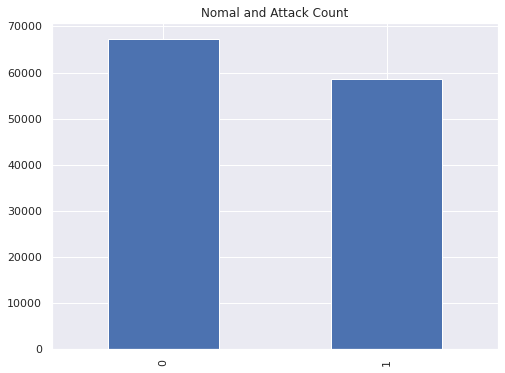

In [ ]:
#To plot single histogram based on single value
#df['attack'].plot(kind='hist', title='Attack Count')
#df_NLSKDD['attack'].plot(kind='hist', title='Attack Count', bins=10, figsize=(12,10)) #Can also add bins and fig size

df_NLSKDDTrain['attack'].value_counts().plot(kind='bar', figsize=(8,6), title='Nomal and Attack Count') 

#legend='Normal","Attack"))


In [ ]:
#df_NLSKDD['attack'].column


In [ ]:
#Drop the class attribute "attack"

#df_NLSKDD = df_NLSKDD.drop('attack', axis = 'columns')

#df_NLSKDD.head()



**Data Pre-processing**

Using OneHotEncoder from Scikitlearn to implement onehot coding for categorical **features**


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
#ct = ColumnTransformer([
 #   ("onehot", OneHotEncoder(handle_unknown='ignore'), ['protocol_type','service','flag']), remainder ='passthrough')

ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), ['protocol_type', 'service', 'flag']),
], remainder='passthrough')

df_train = ct.fit_transform(df_NLSKDDTrain)
df_test = ct.transform(df_NLSKDDTest)

print(df_train.shape)
print(df_test.shape)



(125973, 123)
(22544, 123)


In [ ]:
df_train

array([[0.  , 1.  , 0.  , ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
df_test

array([[0.  , 1.  , 0.  , ..., 1.  , 1.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 1.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.07, 0.07, 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.44, 1.  , 1.  ]])

In [ ]:
#df_train_samples_new = pd.DataFrame.from_records(train_samples_encoded)

In [ ]:
#df_train_samples_new

In [ ]:
#df_train_samples_new.columns

In [ ]:
features = [f for f in dataframe.columns if f not in [:, 1:122]]
len(features)

**Process the data by passing data as numpy array and the normalize the data**

In [ ]:

#Convert dataframe into an array
train_labels = df_NLSKDDTrain["attack"].values
#train_samples = df_train.drop(labels=['attack'], axis=1)

#train_samples = df_train.iloc[:, :122]
#train_labels = df_NLSKDDTrain.iloc[:, -1]

b = np.array(df_train)

train_samples_new = np.delete(b,122,axis=1)

test_labels = df_NLSKDDTest["attack"].values
#X_test = df_test.drop(labels=['attack'], axis=1)

c = np.array(df_test)

test_samples_new = np.delete(c,122,axis=1)

#array = df_NLSKDD_dummies.values

#train_samples = np.array(df_NLSKDD_dummies)
#array[:, 0:118]

#array[:, 41]

print(train_samples_new.shape)
print(train_labels.shape)
#print(train_labels)

print(test_samples_new.shape)
print(test_labels.shape)


(125973, 122)
(125973,)
(22544, 122)
(22544,)


In [ ]:
df_train_samples_new = pd.DataFrame.from_records(train_samples_new)

#df = pd.DataFrame(data = train_samples_new, columns = column_values)

In [ ]:
df_train_samples_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.0,105.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2231.0,384.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
# Split data into train and test to verify accuracy after fitting the model

#X_train, X_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size = 0.2, random_state = 42)

In [ ]:
features = np.array(df_train_samples_new.columns)

In [ ]:
features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121])

In [ ]:
df_train_samples_bo= np.array(df_train_samples_new)

In [ ]:
!pip install boruta

In [ ]:
###Classification Algorithm
from sklearn.ensemble import RandomForestClassifier

###define random forest classifier, set n_jobs parameter to -1 to ###utilize all processors and set n_estimators parameter to 500, ###number of trees in the forest.
rf = RandomForestClassifier(n_jobs=-1, n_estimators=500, oob_score=True, max_depth=6)

In [ ]:
from boruta import BorutaPy

###Define borutapy with rf as estimator and verbose parameter set to ###2 to output which features have been selected already
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter = 50, perc = 90)

In [ ]:
###fit boruta selector to X and y boruta
feat_selector.fit(df_train_samples_new, train_labels)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	122
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	67
Tentative: 	35
Rejected: 	20
Iteration: 	9 / 50
Confirmed: 	67
Tentative: 	35
Rejected: 	20
Iteration: 	10 / 50
Confirmed: 	67
Tentative: 	35
Rejected: 	20
Iteration: 	11 / 50
Confirmed: 	67
Tentative: 	35
Rejected: 	20
Iteration: 	12 / 50
Confirmed: 	68
Tentative: 	34
Rejected: 	20
Iteration: 	13 / 50
Confirmed: 	68
Tentative: 	34
Rejected: 	20
Iteration: 	14 / 50
Confirmed: 	68
Tentative: 	31
Rejected: 	23
Iteration: 	15 / 50
Confirmed: 	68
Tentative: 	31
Rejected: 	23
Iteration: 	16 / 50
Confirmed: 	69
Tentative: 	30
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=6, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=227, n_jobs=-1,
                                          oob_score=True,
                                          random_state=RandomState(MT19937) at 0x7F0724BE47C0,
                                          verbose=0, warm_start=False),
         max_iter=50, n_estimators='auto'

In [ ]:
feat_selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
feat_selector.ranking_

array([ 1,  1,  1,  1,  1,  1, 41,  1,  1,  1,  9,  2,  2,  2,  9,  1, 18,
        1,  1, 15, 16,  1,  1,  1,  1, 41, 20,  1, 41,  2, 41,  1,  1,  9,
       26, 27, 13,  9, 14,  9, 31, 36, 21, 35,  1, 18,  1,  1, 12, 30,  2,
       33,  1, 22, 37, 29, 34,  1, 41,  2, 25,  5, 18,  1, 23, 31,  1, 24,
        1,  1,  1,  2,  1,  5,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  5,  1, 28,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1, 41, 41,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [ ]:
len(feat_selector.support_)

122

In [ ]:

#df1 = pd.DataFrame({"column_names":data_dummiesTrain.columns, "Fea_Imp": list(feat_selector.support_)})

In [ ]:
X_filtered = feat_selector.transform(df_train_samples_new)

In [ ]:
X_filtered.shape

(125973, 70)

In [ ]:
X_filtered

array([[0.  , 1.  , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:


final_features = list()
indexes = np.where(feat_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[df_train_samples_new])
print(final_features)

AttributeError: ignored

In [ ]:
feature_names = df_train.dtype.names

#np.array(df_train.columns)  #Convert dtype string?
#feature_names = train_samples.dtype.names
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(train_samples)  #Apply feature selection and return transformed data

"""
Review the features
"""
# zip feature names, ranks, and decisions 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

TypeError: ignored

***Feature Scaling***

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_filtered)
train_samples_New = scaler.transform(X_filtered)

#scaled_train_samples = scaler.fit_transform(train_samples)
#scaled_train_samples = scaler.transform

#scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))


train_samples_New



array([[0.  , 1.  , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
print(train_samples_New.shape)

print(train_labels.shape)

(125973, 70)
(125973,)


In [ ]:
# Split data into train and test to verify accuracy after fitting the model

X_train, X_test, y_train, y_test = train_test_split(train_samples_New, train_labels, test_size = 0.2, random_state = 42)

In [ ]:
#train_labels = np.array(df_NLSKDD.attack)
#train_samples = np.array(train_samples)

#train_labels, train_samples = shuffle(train_labels, train_samples)

**tf.keras sequential model**

**Create Artificial Neural Network using a sequential model from keras API integrated into tensorflow **

In [ ]:
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
#from sklearn.metrics import mean_squared_error

#Load the TensorBoard notebook extension
#%load_ext tensorboard
#import datetime
#from keras.callbacks import TensorBoard
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import categorical_crossentropy


#Some extra settings for some fancy visualization.
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:


#Building the Model

model = Sequential()
model.add(Dense(256, input_dim = 70, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               18176     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_35 (Activation)   (None, 1)               

**Create the model compiler and then train the network**

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [ ]:
#model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

**Create Validation set**

In [ ]:
#history = model.fit(x=train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=20, shuffle=True, verbose=2)

history = model.fit(x=train_samples_New, y=train_labels, verbose=1, epochs=11, batch_size=256, shuffle=False, validation_split=0.2)

#results = model.evaluate(X_test, y_test)

Epoch 1/11
394/394 [==============================] - 2s 3ms/step - loss: 0.0836 - accuracy: 0.9723 - val_loss: 0.0407 - val_accuracy: 0.9850
Epoch 2/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9853 - val_loss: 0.0323 - val_accuracy: 0.9874
Epoch 3/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9882 - val_loss: 0.0260 - val_accuracy: 0.9904
Epoch 4/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9904 - val_loss: 0.0217 - val_accuracy: 0.9922
Epoch 5/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.0199 - val_accuracy: 0.9925
Epoch 6/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9926 - val_loss: 0.0175 - val_accuracy: 0.9939
Epoch 7/11
394/394 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9935 - val_loss: 0.0157 - val_accuracy: 0.9949
Epoch 

In [ ]:
score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

788/788 [==============================] - 2s 2ms/step - loss: 0.0200 - accuracy: 0.9937
Test loss: 0.01999392919242382
Test accuracy: 0.993689239025116


In [ ]:
print('Summary of the results after each epochs:')
hist = pd.df_NLSKDD(history.history)
hist['epoch'] = history.epoch
hist.tail()

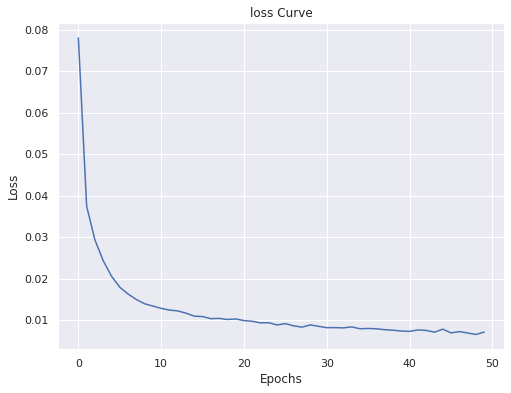

In [ ]:
loss = history.history['loss']

fig = plt.figure(figsize=(8, 6))
plt.title('loss Curve')
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(loss)
plt.show()

In [ ]:
#results = model.evaluate(x_test, y_test)

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

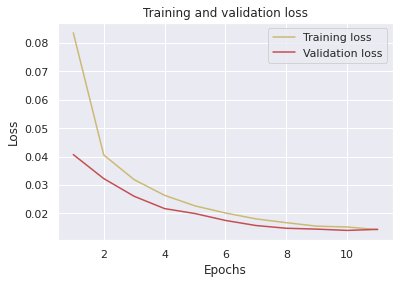

In [ ]:
#Matplotlib to plot the training and validation loss:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
#plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.show()

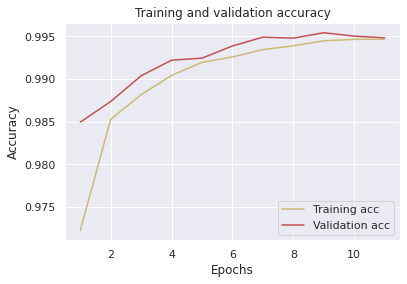

Best Accuracy on training set =  99.46615099906921
Best Accuracy on test set =  99.54355955123901


In [ ]:
#Matplotlib to plot the training and validation accuracy:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on test set = ", max(history.history['val_accuracy'])*100)

#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.show()

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

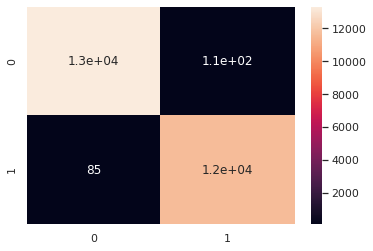

In [ ]:
# making the Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

print(classification_report(y_test, y_pred))

In [ ]:
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC

y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

In [ ]:
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import itertools
import math

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion matrix")
    
  else:
      print("confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
               horizontalalignment="center",
               color="white" if cm[i,j]>thresh else "black")
      
      plt.tight_layout()
      plt.ylabel("True label")
      plt.xlabel("Predicted label")

In [ ]:
cm_plot_labels = ["Normal", "Attack"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="confusion matr